# **Importing Packages**

In [233]:
import numpy as np
import pandas as pd

from scipy import stats
from statsmodels.stats import weightstats as stests
import scipy.stats as stats
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('fivethirtyeight')
import seaborn as sns
import bokeh as bk

import plotly.express as px
import plotly.graph_objs as go

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestRegressor


In [234]:
data=pd.read_csv('E:/HR analytics and prediction/2nd_part.csv')
pd.set_option("display.max_columns", 10000)
data.drop('Unnamed: 0',axis=1,inplace=True)
data.shape

(1373, 25)

In [235]:
data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,Attrition
0,41,1,1102,1,1,2,1,2,2,3,2,1,4,1,5993,8,1,11,3,0,8,1,6,4,1
1,49,2,279,2,8,1,1,3,1,2,2,2,2,2,5130,1,2,23,4,1,10,3,10,7,2
2,37,1,1373,2,2,2,3,4,1,2,1,3,3,1,2090,6,1,15,3,0,7,3,0,0,1
3,33,2,1392,2,3,4,1,4,2,3,1,2,3,2,2909,1,1,11,3,0,8,3,8,7,2
4,27,1,591,2,2,1,2,1,1,3,1,3,2,2,3468,9,2,12,3,1,6,3,2,2,2


In [236]:
data_dup=data.copy()
'''
y=pd.DataFrame()
y['Attrition']=data_dup['Attrition']
data_dup.drop(['Attrition'],axis=1,inplace=True)
data_dup.head()
'''

"\ny=pd.DataFrame()\ny['Attrition']=data_dup['Attrition']\ndata_dup.drop(['Attrition'],axis=1,inplace=True)\ndata_dup.head()\n"

Before applying Dimensionality reduction, it is important to scale down the continous features.

In [237]:
# Select the columns to be scaled
columns_to_scale = ['DailyRate', 'MonthlyIncome']

# Initialize the scaler
scaler = RobustScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data_dup[columns_to_scale])
data_dup.drop(['DailyRate','MonthlyIncome'],axis=1,inplace=True)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Concatenate the scaled DataFrame with the original DataFrame
final_data = pd.concat([data_dup, scaled_df], axis=1)

y=pd.DataFrame()
y['Attrition']=final_data['Attrition']
final_data.drop('Attrition',axis=1,inplace=True)

final_data

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,DailyRate,MonthlyIncome
0,41,1,1,1,2,1,2,2,3,2,1,4,1,8,1,11,3,0,8,1,6,4,0.430636,0.322430
1,49,2,2,8,1,1,3,1,2,2,2,2,2,1,2,23,4,1,10,3,10,7,-0.758671,0.110182
2,37,1,2,2,2,3,4,1,2,1,3,3,1,6,1,15,3,0,7,3,0,0,0.822254,-0.637482
3,33,2,2,3,4,1,4,2,3,1,2,3,2,1,1,11,3,0,8,3,8,7,0.849711,-0.436055
4,27,1,2,2,1,2,1,1,3,1,3,2,2,9,2,12,3,1,6,3,2,2,-0.307803,-0.298574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,36,2,2,23,2,2,3,1,4,2,3,4,2,4,2,17,3,1,17,3,5,2,0.115607,-0.519183
1369,39,1,2,6,1,2,4,1,2,3,5,1,2,4,2,15,3,1,9,3,7,7,-0.276012,1.305706
1370,27,1,2,4,3,1,2,1,4,2,4,2,2,1,1,20,4,1,6,3,6,2,-0.937861,0.359075
1371,49,2,1,2,3,2,4,1,2,2,1,2,2,2,2,14,3,0,17,2,9,6,0.316474,0.174127


**Performing Dimensionality Reduction**

C:\Users\AKHIL TEJA REDDY Y\AppData\Local\Temp\ipykernel_20216\1368814827.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(final_data,y)


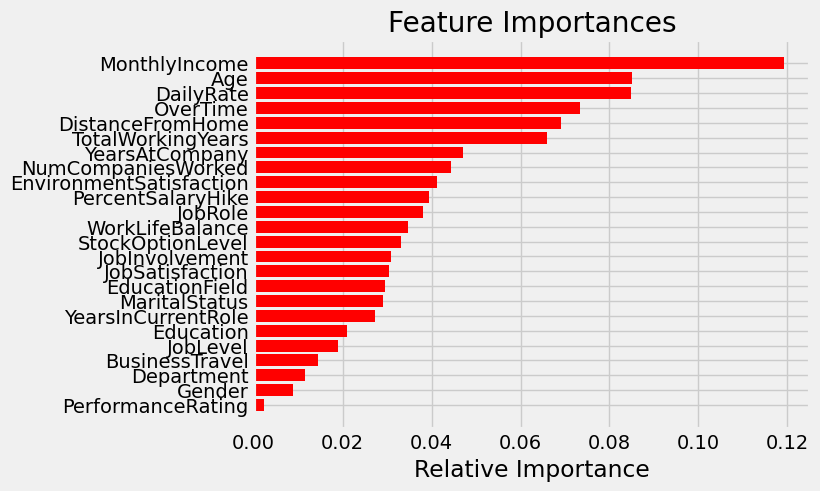

In [238]:
#using random-forest regressor to check dimensionality of features
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(final_data,y)
#After fitting the model, plot the feature importance graph:

features = final_data.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-28:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The last 5 columns can be eliminated as they less importance
1. performance rating
2. gender
3. department
4. business travel
5. job level

In [239]:
data.drop(['PerformanceRating','Gender','Department','BusinessTravel','JobLevel'],axis=1,inplace=True)
print(data.shape)
data.head()

(1373, 20)


,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,Attrition
0,41,1102,1,2,1,2,3,1,4,1,5993,8,1,11,0,8,1,6,4,1
1,49,279,8,1,1,3,2,2,2,2,5130,1,2,23,1,10,3,10,7,2
2,37,1373,2,2,3,4,2,3,3,1,2090,6,1,15,0,7,3,0,0,1
3,33,1392,3,4,1,4,3,2,3,2,2909,1,1,11,0,8,3,8,7,2
4,27,591,2,1,2,1,3,3,2,2,3468,9,2,12,1,6,3,2,2,2


# **Processing Data For Predictions**

**Processing The Dataset Based on Previous Analysis**

In [240]:
#importing data
data_ml = pd.read_csv('E:/HR analytics and prediction\Excel Files/employee_attrition.csv')
data_ml.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,Yes
1,2,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,No
2,4,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,Yes
3,5,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,No
4,7,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,No


**Based on the answers achieved from previous analysis**
**Below Columns are removed and a constraint is also placed**

In [241]:
data_ml = data_ml[data_ml['MonthlyIncome'] < 17000] # removing values above 1700 as they are considered to be outliers
data_ml.drop(['EmployeeNumber','RelationshipSatisfaction','HourlyRate','MonthlyRate','TrainingTimesLastYear','YearsSinceLastPromotion','YearsWithCurrManager'],inplace=True,axis=1) #it is being removed, as it accepts null hypothesis
print(data_ml.shape)

#removing columns that have low relative importance obtained from random forest regressor
data_ml.drop(['PerformanceRating','Gender','Department','BusinessTravel','JobLevel'],axis=1,inplace=True)
print(data_ml.shape)

data_ml['JobRole'].replace(['Manager','Sales Executive','Research Director','Research Scientist',
                            'Human Resources','Manufacturing Director','Healthcare Representative',
                            'Sales Representative','Laboratory Technician'],[1,2,3,4,5,6,7,8,9],inplace=True)

data_ml.head()

(1373, 25)
(1373, 20)


,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,Attrition
0,41,1102,1,2,Life Sciences,2,3,2,4,Single,5993,8,Yes,11,0,8,1,6,4,Yes
1,49,279,8,1,Life Sciences,3,2,4,2,Married,5130,1,No,23,1,10,3,10,7,No
2,37,1373,2,2,Other,4,2,9,3,Single,2090,6,Yes,15,0,7,3,0,0,Yes
3,33,1392,3,4,Life Sciences,4,3,4,3,Married,2909,1,Yes,11,0,8,3,8,7,No
4,27,591,2,1,Medical,1,3,9,2,Married,3468,9,No,12,1,6,3,2,2,No


# **One Hot Encoding**

In [242]:
categorical_columns=['EducationField','MaritalStatus','OverTime'] #mentioning the columns to encode
encoder = OneHotEncoder() #calling one hot encoder

# Fit and transform the data for the categorical columns
one_hot_encoded = encoder.fit_transform(data_ml[categorical_columns])

# Create a new dataframe from the one-hot encoded data
data_encoded = pd.DataFrame.sparse.from_spmatrix(one_hot_encoded, 
                                               columns=encoder.get_feature_names_out(categorical_columns))

#dropping original categorical columns
data_ml.drop(categorical_columns,axis=1,inplace=True)
data_ml.head()

# Concatenate the original dataframe with the one-hot encoded dataframe
#data_concat= pd.concat([data_ml.drop(categorical_columns, axis=1), data_encoded], axis=1)



,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,Attrition
0,41,1102,1,2,2,3,2,4,5993,8,11,0,8,1,6,4,Yes
1,49,279,8,1,3,2,4,2,5130,1,23,1,10,3,10,7,No
2,37,1373,2,2,4,2,9,3,2090,6,15,0,7,3,0,0,Yes
3,33,1392,3,4,4,3,4,3,2909,1,11,0,8,3,8,7,No
4,27,591,2,1,1,3,9,2,3468,9,12,1,6,3,2,2,No


In [243]:
#changing datatypes for newly encoded data
data_encoded['EducationField_Human Resources'] = data_encoded['EducationField_Human Resources'].astype(int)
data_encoded['EducationField_Life Sciences'] = data_encoded['EducationField_Life Sciences'].astype(int)
data_encoded['EducationField_Marketing'] = data_encoded['EducationField_Marketing'].astype(int)
data_encoded['EducationField_Medical'] = data_encoded['EducationField_Medical'].astype(int)
data_encoded['EducationField_Other'] = data_encoded['EducationField_Other'].astype(int)
data_encoded['EducationField_Technical Degree'] = data_encoded['EducationField_Technical Degree'].astype(int)
data_encoded['MaritalStatus_Divorced'] = data_encoded['MaritalStatus_Divorced'].astype(int)
data_encoded['MaritalStatus_Married'] = data_encoded['MaritalStatus_Married'].astype(int)
data_encoded['MaritalStatus_Single'] = data_encoded['MaritalStatus_Single'].astype(int)
data_encoded['OverTime_No'] = data_encoded['OverTime_No'].astype(int)
data_encoded['OverTime_Yes'] = data_encoded['OverTime_Yes'].astype(int)

In [244]:
# reset the indices of both dataframes
data_ml = data_ml.reset_index(drop=True)
data_encoded = data_encoded.reset_index(drop=True)

#concating the original dataset and newly formed concatenated dataset
final_dataset= pd.concat([data_ml,data_encoded],axis=1)
final_dataset

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,Attrition,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,3,2,4,5993,8,11,0,8,1,6,4,Yes,0,1,0,0,0,0,0,0,1,0,1
1,49,279,8,1,3,2,4,2,5130,1,23,1,10,3,10,7,No,0,1,0,0,0,0,0,1,0,1,0
2,37,1373,2,2,4,2,9,3,2090,6,15,0,7,3,0,0,Yes,0,0,0,0,1,0,0,0,1,0,1
3,33,1392,3,4,4,3,4,3,2909,1,11,0,8,3,8,7,No,0,1,0,0,0,0,0,1,0,0,1
4,27,591,2,1,1,3,9,2,3468,9,12,1,6,3,2,2,No,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,36,884,23,2,3,4,9,4,2571,4,17,1,17,3,5,2,No,0,0,0,1,0,0,0,1,0,1,0
1369,39,613,6,1,4,2,7,1,9991,4,15,1,9,3,7,7,No,0,0,0,1,0,0,0,1,0,1,0
1370,27,155,4,3,2,4,6,2,6142,1,20,1,6,3,6,2,No,0,1,0,0,0,0,0,1,0,0,1
1371,49,1023,2,3,4,2,2,2,5390,2,14,0,17,2,9,6,No,0,0,0,1,0,0,0,1,0,1,0


# **Scaling Continous Data**

**Applying Robust Scalar, Standard Scalar, MinMAx Scaling Techniques**

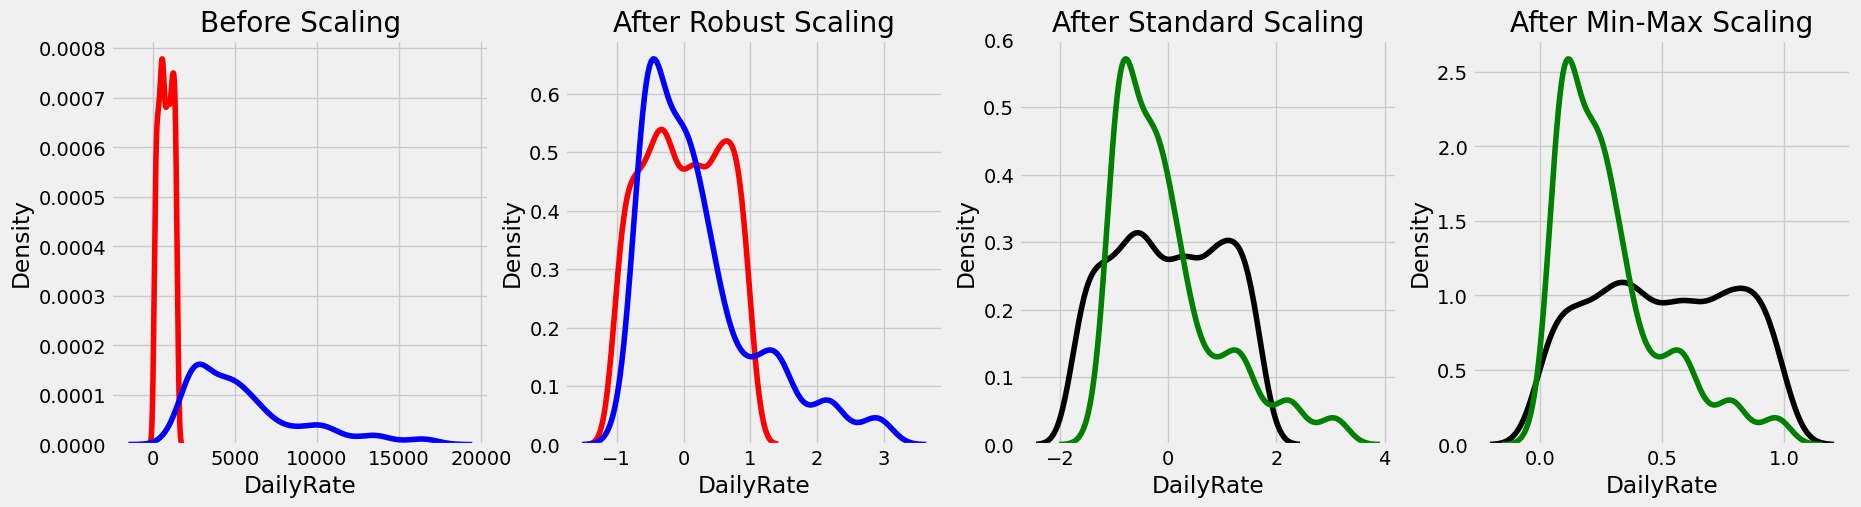

In [245]:
# data
x= pd.DataFrame()#creating a new dataframe that contains continous data columns that needs to be scaled
x['DailyRate']=final_dataset['DailyRate']
x['MonthlyIncome']=final_dataset['MonthlyIncome']

scaler = preprocessing.RobustScaler() #using robust scaler for preprocessing
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['DailyRate', 'MonthlyIncome'])

scaler = preprocessing.StandardScaler()#using standard scaler for preprocessing
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['DailyRate', 'MonthlyIncome'])

scaler = preprocessing.MinMaxScaler()#using minmax scaler for preprocessing
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['DailyRate', 'MonthlyIncome'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')

#visualizing the columns for easier understanding of which to scaling technique to use
sns.kdeplot(x['DailyRate'], ax = ax1, color ='r') 
sns.kdeplot(x['MonthlyIncome'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')

sns.kdeplot(robust_df['DailyRate'], ax = ax2, color ='red')
sns.kdeplot(robust_df['MonthlyIncome'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')

sns.kdeplot(standard_df['DailyRate'], ax = ax3, color ='black')
sns.kdeplot(standard_df['MonthlyIncome'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')

sns.kdeplot(minmax_df['DailyRate'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['MonthlyIncome'], ax = ax4, color ='g')
plt.show()


**By observing from above visualizations, it is useful to consider robust scaling,since data is eventually spreaded out.**

In [246]:
#removing continous data columns from the final dataset
final_dataset= final_dataset.drop(['DailyRate','MonthlyIncome'],axis=1)

final_dataset = pd.concat([final_dataset,robust_df],axis=1)#concating the datasets
final_dataset

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobRole,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,Attrition,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,DailyRate,MonthlyIncome
0,41,1,2,2,3,2,4,8,11,0,8,1,6,4,Yes,0,1,0,0,0,0,0,0,1,0,1,0.430636,0.322430
1,49,8,1,3,2,4,2,1,23,1,10,3,10,7,No,0,1,0,0,0,0,0,1,0,1,0,-0.758671,0.110182
2,37,2,2,4,2,9,3,6,15,0,7,3,0,0,Yes,0,0,0,0,1,0,0,0,1,0,1,0.822254,-0.637482
3,33,3,4,4,3,4,3,1,11,0,8,3,8,7,No,0,1,0,0,0,0,0,1,0,0,1,0.849711,-0.436055
4,27,2,1,1,3,9,2,9,12,1,6,3,2,2,No,0,0,0,1,0,0,0,1,0,1,0,-0.307803,-0.298574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,36,23,2,3,4,9,4,4,17,1,17,3,5,2,No,0,0,0,1,0,0,0,1,0,1,0,0.115607,-0.519183
1369,39,6,1,4,2,7,1,4,15,1,9,3,7,7,No,0,0,0,1,0,0,0,1,0,1,0,-0.276012,1.305706
1370,27,4,3,2,4,6,2,1,20,1,6,3,6,2,No,0,1,0,0,0,0,0,1,0,0,1,-0.937861,0.359075
1371,49,2,3,4,2,2,2,2,14,0,17,2,9,6,No,0,0,0,1,0,0,0,1,0,1,0,0.316474,0.174127


**Final touch to the dataset is being done**

In [247]:
#encoding the target feature 
final_dataset['Attrition'].replace(['Yes','No'],[1,0],inplace=True)
final_dataset.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobRole,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,Attrition,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,DailyRate,MonthlyIncome
0,41,1,2,2,3,2,4,8,11,0,8,1,6,4,1,0,1,0,0,0,0,0,0,1,0,1,0.430636,0.322430
1,49,8,1,3,2,4,2,1,23,1,10,3,10,7,0,0,1,0,0,0,0,0,1,0,1,0,-0.758671,0.110182
2,37,2,2,4,2,9,3,6,15,0,7,3,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0.822254,-0.637482
3,33,3,4,4,3,4,3,1,11,0,8,3,8,7,0,0,1,0,0,0,0,0,1,0,0,1,0.849711,-0.436055
4,27,2,1,1,3,9,2,9,12,1,6,3,2,2,0,0,0,0,1,0,0,0,1,0,1,0,-0.307803,-0.298574


In [248]:
#exporting the csv file
final_dataset.to_csv('final_dataset.csv')